In [1]:
from os import listdir
import numpy as np
import pandas as pd
import string
from nltk.translate.bleu_score import corpus_bleu
from pickle import load, dump
from IPython.display import Image
 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model, to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input 
from keras.models import Model, load_model
from keras.layers import Input, Dense, Flatten, LSTM
from keras.layers import RepeatVector, TimeDistributed
from keras.layers import Embedding
from keras.layers.merge import concatenate
from keras.layers.pooling import GlobalMaxPooling2D
from keras.layers.pooling import GlobalAveragePooling2D

from caption_generation_model_API import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

C:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    in_layer = Input(shape=(224, 224, 3))
    model = VGG16(include_top=False, input_tensor=in_layer)
#     print(model.summary())
    
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
        
    return feature

In [3]:
# # Remeber to svae the tokenizer

# import pickle

# # saving
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [4]:
ori_path = 'D:/Program/train_model/image_caption/'
model_path = ori_path+'fe_avg_pool/fe_avg_pool.h5'

picname_path = ori_path+'test_data/'+picname
pic_path = ori_path+'test_data/'
des_path = ori_path+'test_data/descriptions.txt'
tokenizer_path = ori_path+'test_data/tokenizer.pickle'

max_length = 30

In [5]:
# loading
with open(tokenizer_path, 'rb') as handle:
    tokenizer = load(handle)
    
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: {}'.format(vocab_size))

Vocabulary Size: 3699


In [6]:
model = load_model(model_path)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
global_average_pooling2d_2 (Glo (None, 512)          0           input_3[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 30, 50)       184950      input_4[0][0]                    
__________________________________________________________________________________________________
dense_5 (D

In [7]:
pic_list = []

for name in listdir(pic_path):
    if name.split('.')[1]=='jpg':
        name_path = pic_path+name
        pic_list.append(name_path)

In [8]:
%%time

feature_list = []

for i in pic_list:
    feature = extract_features(i)
    feature_list.append(feature)

Wall time: 15.3 s


In [9]:
np.array(feature_list).shape

(12, 1, 7, 7, 512)

In [10]:
%%time
gen_sentence_list = []

for feature in feature_list:

    gen_sentence = generate_desc(model, tokenizer, feature, max_length)
    gen_sentence_list.append(gen_sentence)

Wall time: 10.5 s


In [11]:
gen_sentence_list

['startseq hands of people are standing in front of twisting off of sandals endseq',
 'startseq man in red shirt is jumping on the beach endseq',
 'startseq man is doing students on the cows endseq',
 'startseq basketball player in white helmet is guns endseq',
 'startseq baseball player in white helmet is guns endseq',
 'startseq basketball player special on the dry endseq',
 'startseq man is trail around endseq',
 'startseq girl in group jacket is dancing the the smiles endseq',
 'startseq man in group shirt is standing on the street endseq',
 'startseq dog is stripes through the grass endseq',
 'startseq people area on displayed in front of grey endseq',
 'startseq brown dog is running through the grass endseq']

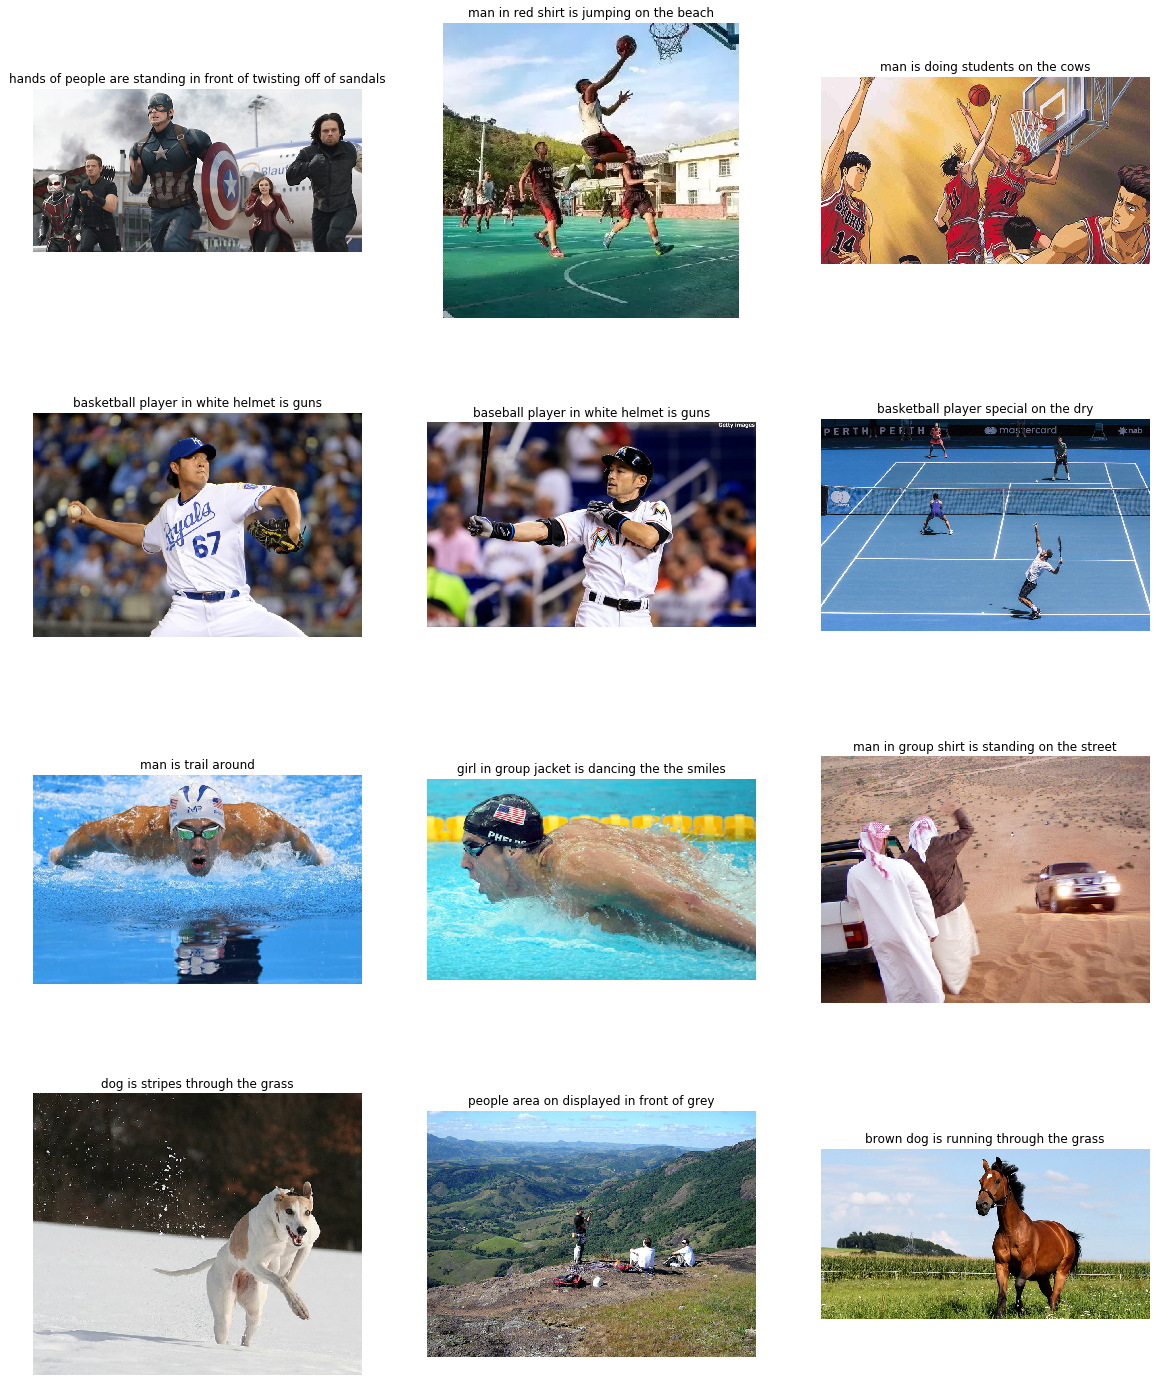

In [17]:
plt.figure(figsize=(20,25))

for i in range(12):

    plt.subplot(4,3,1+i)
    img=mpimg.imread(pic_list[i])
    imgplot = plt.imshow(img)
    # plt.gca().set_xticks([])
    # plt.gca().set_yticks([])
    plt.axis('off')
    plt.title(gen_sentence_list[i][9:-7])


In [20]:
def single_pic_gen(pic):
    feature = extract_features(pic)
    gen_sentence = generate_desc(model, tokenizer, feature, max_length)
    
    return gen_sentence

In [27]:
picname = 'pic12.jpg'

picname_path = ori_path+'test_data/'+picname
picname_path

'D:/Program/train_model/image_caption/test_data/pic12.jpg'

In [28]:
single_sen = single_pic_gen(picname_path)

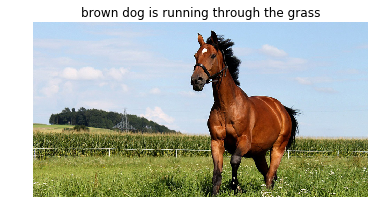

In [29]:
img=mpimg.imread(picname_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.title(single_sen[9:-7])
plt.show()